# Prac 02
For this homework you will have to complete and implement the colour balancing for:
* Gray world algorithm
* Scale-by-max algorithm

You are free to use your own images. Experiment with more images and think about the effect each of the algorithms has on the resulting (balanced) image.

### Colour Balancing
In this notebook we will show different type of colour balancing making use of von Kries' hypothesis.

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]

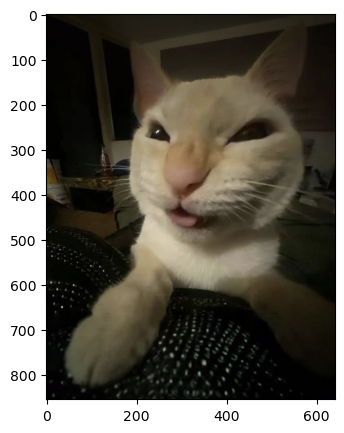

In [2]:
img = cv2.imread('mehehew.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [3]:
print(img.shape)


(855, 641, 3)


### White patch
In white patch algorithm we choose a group of pixels we know they should be white. We then scale the resulting image colour channels by this white patch.

(<Axes: >, <matplotlib.image.AxesImage at 0x2480f144e10>)

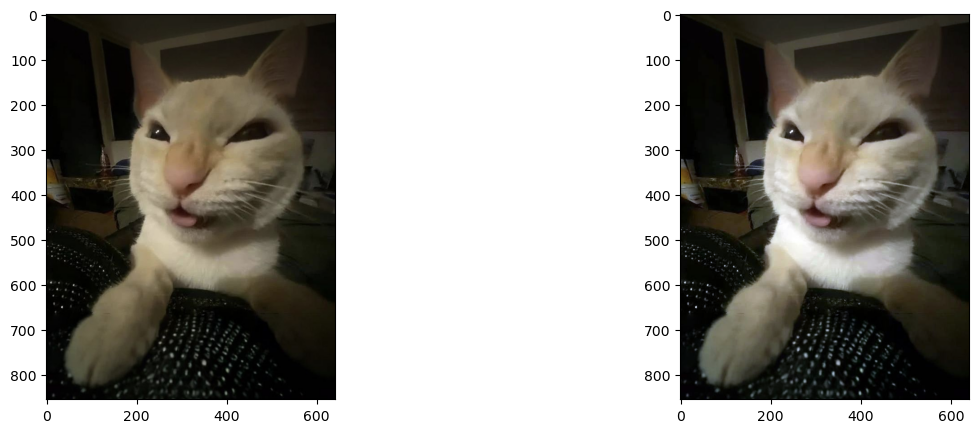

In [4]:
# Define white patch and the coefficients
row, col = 500, 250 
white = img[row, col, :]
coeffs = 255.0/white

# Apply white balancing and generate balanced image
balanced = np.zeros_like(img, dtype=np.float32)
for channel in range(3):
    balanced[..., channel] = img[..., channel] * coeffs[channel]

# White patching does not guarantee that the dynamic range is preserved, images must be clipped.
balanced = balanced/255
balanced[balanced > 1] = 1

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)

In [12]:
print(balanced[row, col, :])

[1. 1. 1.]


### Gray world
This algorithm assumes that a scene, on average, is gray.

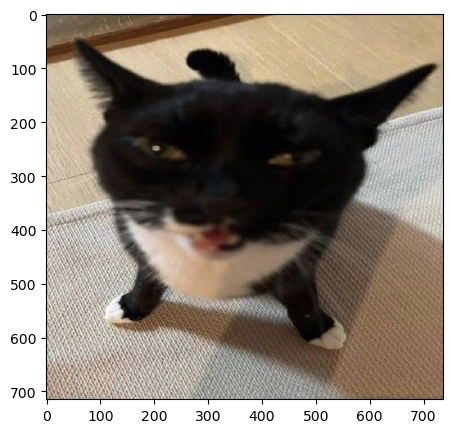

In [5]:
img_2 = cv2.imread('kittie.jpg')
img_2 = cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB)
plt.imshow(img_2)

(<Axes: >, <matplotlib.image.AxesImage at 0x2480e22a850>)

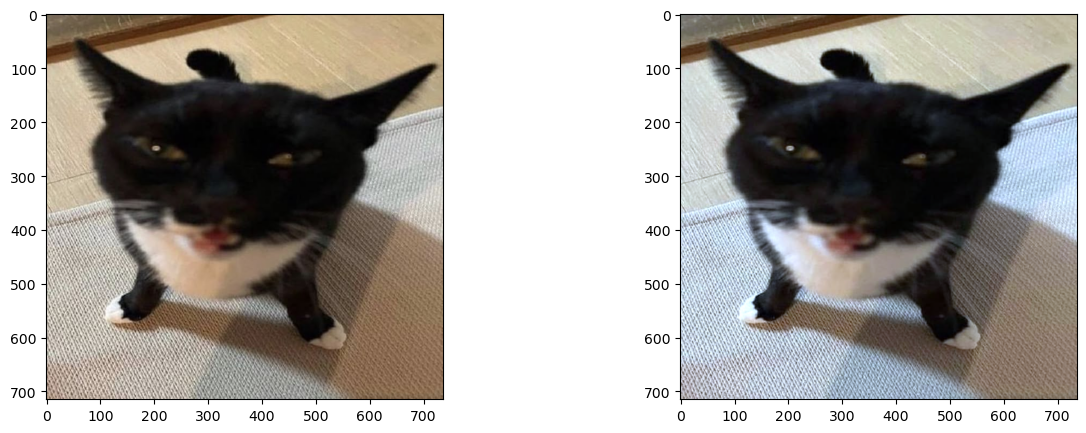

In [6]:
# Compute the mean values for all three colour channels (red, green, blue)
mean_r = np.mean(img_2[...,0])
mean_g = np.mean(img_2[...,1])
mean_b = np.mean(img_2[...,2])

# Compute the coefficients kr, kg, kb
# Note: there are 3 coefficients to compute but we only have 2 equations.
# Therefore, you have to make an assumption, fix the value of one of the
# coefficients and compute the remining two
# Hint: You can fix the coefficient of the brightest colour channel to 1.
max_mean = max(mean_r, mean_g, mean_b)

kr = max_mean / mean_r
kg = max_mean / mean_g
kb = max_mean / mean_b 

# Apply color balancing and generate the balanced image
balanced_2 = np.zeros_like(img_2, dtype=np.float32)
balanced_2[...,0] = img_2[...,0] * kr
balanced_2[...,1] = img_2[...,1] * kg
balanced_2[...,2] = img_2[...,2] * kb

balanced_2 = balanced_2 / 255
balanced_2[balanced_2 > 1] = 1 

# Show the original and the balanced image side by side
plt.subplot(121), plt.imshow(img_2)
plt.subplot(122), plt.imshow(balanced_2)

In [13]:
print(mean_r, mean_g, mean_b)

0.47282478 0.47253495 0.46977767


### Scale-by-max
This is a straightforward algorithm that scales each colour channel by its maximum value. Note that it is sensitive to noise and saturations.

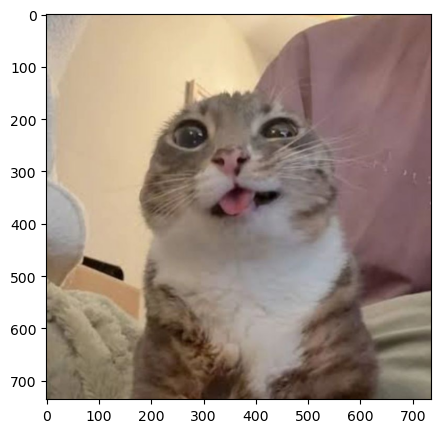

In [7]:
# Load your image
img_3 = cv2.imread('cat2.jpg')
img_3 = cv2.cvtColor(img_3, cv2.COLOR_BGR2RGB)
plt.imshow(img_3)

(<Axes: >, <matplotlib.image.AxesImage at 0x24812f2aad0>)

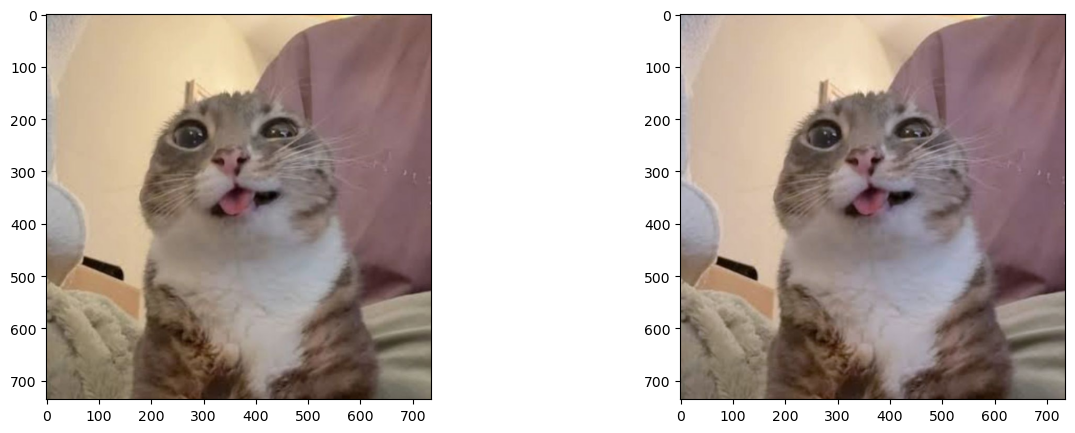

In [9]:
# Compute the maximum values for all three colour channels (red, green, blue)
max_r = np.max(img_3[...,0])
max_g = np.max(img_3[...,1])
max_b = np.max(img_3[...,2])

# Apply scale-by-max balancing and generate the balanced image
balanced_3 = img_3.astype(np.float32)
balanced_3[..., 0] *= 255.0 / max_r
balanced_3[..., 1] *= 255.0 / max_g
balanced_3[..., 2] *= 255.0 / max_b
balanced_3 = np.clip(balanced_3, 0, 255).astype(np.uint8)

plt.subplot(121), plt.imshow(img_3)
plt.subplot(122), plt.imshow(balanced_3)

In [14]:
print(max_r, max_g, max_b)

255 255 255
